In [1]:
%matplotlib inline
import networkx as nx
import matplotlib as plt
import random

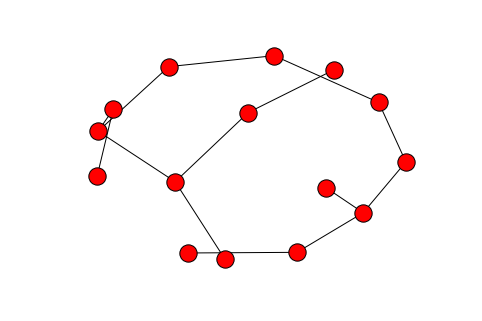

In [2]:
G0 = nx.random_lobster(5, 0.5, 0.5)
ingraph_nnodes = len(G0.nodes())
ingraph_edges = G0.edges()
nx.draw(G0)

In [3]:
class Cut_Finder(object):
    def __init__(self, ingraph_nnodes, ingraph_edges):
        G = nx.Graph()
        G.add_nodes_from(range(2*ingraph_nnodes))

        for i in range(ingraph_nnodes):
            G.add_edge(2*i, 2*i+1)

        for v1, v2 in ingraph_edges:
            G.add_edge(v1*2+1, v2*2) 
        
        self.G = G
        self.in_nodes = ingraph_nnodes
        self.in_edges = set(ingraph_edges)
        self.capacity_edges = [(2*i, 2*i+1) for i in range(ingraph_nnodes)]  
        
    def update_capacities(self, ingraph_capacities):
        edge_capacities = dict(zip(self.capacity_edges, ingraph_capacities))
        nx.set_edge_attributes(self.G, 'capacity', edge_capacities)        
    
    def find_cutset(self, in1, in2):
        try:
            _, (reachable, non_reachable) = nx.minimum_cut(self.G, in1*2+1, in2*2)
        except nx.NetworkXUnbounded:
            print('unbounded flow for nodes %d and %d'%(in1, in2))
        cutset = set()
        for u, nbrs in ((n, self.G[n]) for n in reachable):
            cutset.update((u, v) for v in nbrs if v in non_reachable)
        return [i//2 for (i, _) in cutset]
    
    def get_cutsets(self, ingraph_capacities):
        self.update_capacities(ingraph_capacities)
        
        cutsets = []
        for in1 in range(self.in_nodes):
            for in2 in range(in1+1, self.in_nodes):
                if (in1, in2) in self.in_edges: continue
                if ingraph_capacities[in1] + ingraph_capacities[in2] <= 1: continue
                    
                cutset = self.find_cutset(in1, in2)
                cut_csum = sum(ingraph_capacities[i] for i in cutset)
                if cut_csum < ingraph_capacities[in1] + ingraph_capacities[in2] -1:
                    cutsets.append((in1, in2, cutset))
        return cutsets

In [4]:
G0.edges()

[(0, 1),
 (0, 9),
 (1, 2),
 (1, 10),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 11),
 (6, 7),
 (7, 8),
 (7, 13),
 (11, 12),
 (13, 14)]

In [5]:
cf = Cut_Finder(len(G0.nodes()), G0.edges())
node_capacities = [random.random() for i in range(len(G0.nodes()))]
cf.get_cutsets(node_capacities)

[(0, 2, [1]),
 (0, 7, [5]),
 (0, 11, [5]),
 (0, 13, [5]),
 (1, 7, [5]),
 (1, 11, [5]),
 (1, 13, [5]),
 (2, 6, [5]),
 (2, 7, [5]),
 (2, 9, [1]),
 (2, 11, [5]),
 (2, 12, [5]),
 (2, 13, [5]),
 (3, 11, [5]),
 (3, 13, [5]),
 (6, 9, [5]),
 (7, 9, [5]),
 (7, 10, [5]),
 (9, 10, [1]),
 (9, 11, [5]),
 (9, 12, [5]),
 (9, 13, [5]),
 (10, 11, [5]),
 (10, 13, [5]),
 (11, 13, [7])]